In [560]:
import IPython.display as ipd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

video_path = os.path.join('heart-attack-video/', 'Heart_attack_explanation.mp4')
ipd.Video(video_path, width=700, embed=True)

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('heart_attack_prediction_dataset.csv')
attributes = data.columns
print(attributes)

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


### Data Understanding
The dataset consists of 8763 individuals data. There are 14 columns in the dataset, which are described below:

**Patient ID** - Unique identifier for each patient<br>
No relationship with heart attack risk;

**Age** - Age of the patient<br>
Higher age is often associated with an increased risk of heart attack.

**Sex** - Sex of the patient (Male/Female)<br>
Some studies show no relationship between sex and risk of heart attack, while others claim that males have a higher risk than females.

**Cholesterol** - Cholesterol levels of the patient<br>
High cholesterol is a risk factor for heart attacks.

**Blood Pressure** - Blood pressure of the patient (systolic/diastolic)<br>
High blood pressure is a risk factor for heart attacks.

**Heart Rate** - Heart rate of the patient<br>
Abnormal heart rates can indicate heart problems.

**Diabetes** - Whether the patient has diabetes (Yes/No)<br>
Diabetes is a significant risk factor for heart attacks.

**Family History** - Family history of heart-related problems (1: Yes, 0: No)<br>
Family history can indicate genetic risk factors.

**Smoking** - Smoking status of the patient (1: Smoker, 0: Non-smoker)<br>
Smoking is a known risk factor for heart attacks.

**Obesity** - Obesity status of the patient (1: Obese, 0: Not obese)<br>
Obesity is a risk factor for heart attacks.

**Alcohol Consumption** - Level of alcohol consumption by the patient (None/Light/Moderate/Heavy)<br>
Excessive alcohol can increase the risk.

**Exercise Hours Per Week** - Number of exercise hours per week<br>
Regular exercise can reduce the risk.

**Diet** - Dietary habits of the patient (Healthy/Average/Unhealthy)<br>
Diet can impact heart health.

**Previous Heart Problems** - Previous heart problems of the patient (1: Yes, 0: No)<br>
A history of heart problems can indicate increased risk.

**Medication Use** - Medication usage by the patient (1: Yes, 0: No)<br>
Medications may affect heart health.

**Stress Level** - Stress level reported by the patient (1-10)<br>
High stress levels can be a risk factor.

**Sedentary Hours Per Day** - Hours of sedentary activity per day<br>
Sedentary lifestyle can increase the risk.

**Income** - Income level of the patient<br>
Income may indirectly affect lifestyle choices that impact risk.

**BMI** - Body Mass Index (BMI) of the patient<br>
Higher BMI can increase heart attack risk.

**Triglycerides** - Triglyceride levels of the patient<br>
High triglyceride levels are a risk factor.

**Physical Activity Days Per Week** - Days of physical activity per week<br>
Regular physical activity can reduce risk.

**Sleep Hours Per Day** - Hours of sleep per day<br>
Inadequate or excessive sleep can affect heart health.

**Country** - Country of the patient<br>
Country of residence may influence lifestyle and healthcare access.

**Continent** - Continent where the patient resides<br>
Continent may reflect regional health trends.

**Hemisphere** - Hemisphere where the patient resides<br>
Hemisphere may also reflect regional health trends.

**Heart Attack Risk** - Presence of heart attack risk (1: Yes, 0: No)<br>
The target variable indicating the presence or absence of heart attack risk.

### Data Exploration
#### All columns

In [561]:
print(data.head())

  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  

In [562]:
total_rows = data.shape[0]
print("Total Number of Rows:", total_rows)

Total Number of Rows: 8763


We had initially chosen another dataset, but which only contained 300 rows. We are therefore pleased that this one contains more than 8,000 rows, because we feel that this will enable us to study the issue of heart attacks properly. However, we'll be checking later whether the dataset is balanced or not, despite the large number of lines.
##### Missing values

In [563]:
missing_values = data.isnull().sum()
print(missing_values)

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


*There are no missing values in any of the attributes. So there are no lines to delete or fill in.*

##### Duplicated values
duplicates=data.duplicated()
duplicated_rows=data[data.duplicated()]
print(len(duplicated_rows))

*There are no duplicated rows in the dataset. So there are no lines to delete.*
#### ID column
##### Type and senseless values

In [564]:
print(data['Patient ID'].dtype)
### Check if all identifiers are unique
print(len(data) - len(data['Patient ID'].unique()))

object
0


*All the ids are unique so we don't have duplicated users.<br>
This attribute does not provide us with any information for the rest of the project, so we are going to delete it.*

In [565]:
data.drop(columns=['Patient ID'], inplace=True)

#### Age column
##### Type

In [566]:
print(data['Age'].dtype)

int64


*Age has a numerical type which is what we want.*
##### Senseless values and Repartition

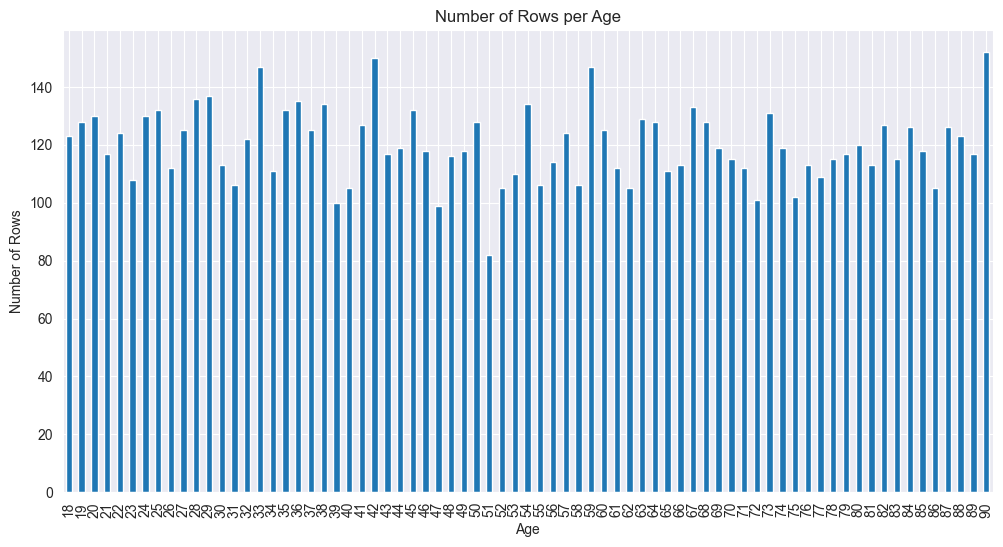

In [567]:
age_counts = data['Age'].value_counts()
age_counts = age_counts.sort_index()
plt.figure(figsize=(12, 6))
age_counts.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Age')
plt.show()

*We can note that the age column has no senseless values, since these are between 18 and 90 years old.
The repartition between the category is quite well-balanced*

##### Link with heart attack risk

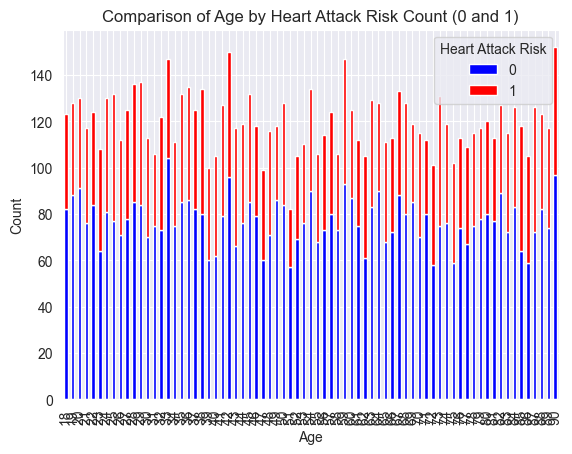

In [568]:
count_data = data.groupby(['Age', 'Heart Attack Risk']).size().unstack(fill_value=0)
ax = count_data.plot(kind='bar', stacked=True, color=['b', 'r'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Comparison of Age by Heart Attack Risk Count (0 and 1)')
plt.legend(title='Heart Attack Risk', labels=['0', '1'])
plt.show()

#### Sex column
##### Type and senseless values

In [569]:
print(data['Sex'].dtype)
sex = data['Sex'].unique()
print(sex)

object
['Male' 'Female']


*We can note that the sex column has no senseless values, since these are 2 correct values
For the rest, it is preferable to change the sex type to numerical values.*

In [570]:
#make Sex numerical
# Create an empty dictionary to store the mapping
sex_mapping = {}
# Iterate over unique sexes and assign numerical values from 0 to 1
for i in range(len(sex)):
    sex_mapping[sex[i]] = i
# Map the 'Sex' column using the created mapping
data['Sex'] = data['Sex'].map(sex_mapping)

##### Repartition

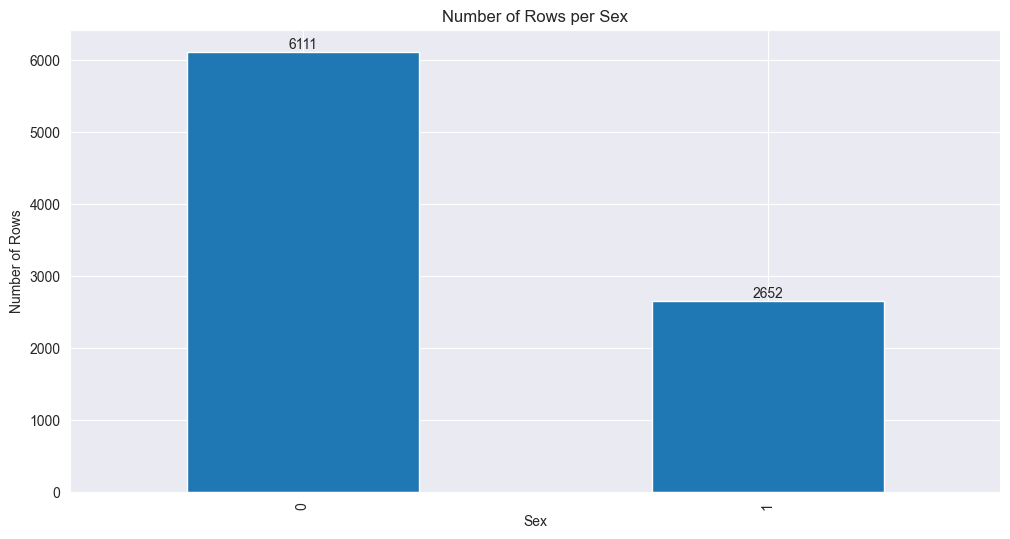

In [571]:
sex_counts = data['Sex'].value_counts()
sex_counts = sex_counts.sort_index()
plt.figure(figsize=(12, 6))
sex_counts.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Sex')
for i, count in enumerate(sex_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

*The repartition between the 2 categories is not well-balanced since there are more than twice as many males as females*

##### Link with Heart Attack Risk

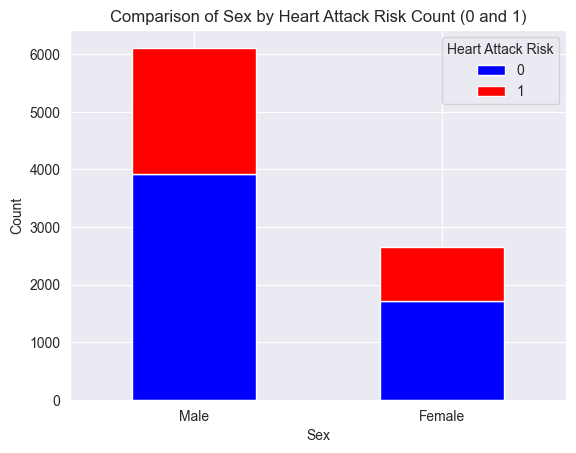

In [572]:
count_data = data.groupby(['Sex', 'Heart Attack Risk']).size().unstack(fill_value=0)
ax = count_data.plot(kind='bar', stacked=True, color=['b', 'r'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Comparison of Sex by Heart Attack Risk Count (0 and 1)')
ax.set_xticklabels(['Male', 'Female'], rotation=0)
plt.legend(title='Heart Attack Risk', labels=['0', '1'])
plt.show()

TODO

#### Blood Pressure column
##### Type

In [573]:
print(data['Blood Pressure'].dtype)
blood_pressure = data['Blood Pressure'].unique()
print(blood_pressure)

object
['158/88' '165/93' '174/99' ... '137/94' '94/76' '119/67']


*Blood Pressure has a numerical type which is what we want.
But since there are so many values and the important thing is the number in general and not so many in particular, we're going to create categories: *

... TODO

In [574]:
# Make Blood Pressure numerical
#Sample blood pressure values in the format "systolic/diastolic"
blood_pressure_values = data['Blood Pressure'].astype(str).tolist()

# Function to categorize blood pressure values
def categorize_blood_pressure(bp):
    try:
        systolic, diastolic = map(int, bp.split('/'))
        if systolic > 130 or diastolic > 90:
            return 0
        elif systolic > 90 or diastolic > 60:
            return 1
        else:
            return 2
    except (ValueError, AttributeError):
        # Handle unexpected or missing data
        return -1  # You can assign a special value for such cases

# Applying the function to the blood pressure values
categorized_blood_pressure = [categorize_blood_pressure(bp) for bp in blood_pressure_values]

# Replace the original 'Blood Pressure' column with categorized blood pressure values
data['Blood Pressure'] = categorized_blood_pressure

##### Senseless values and Repartition

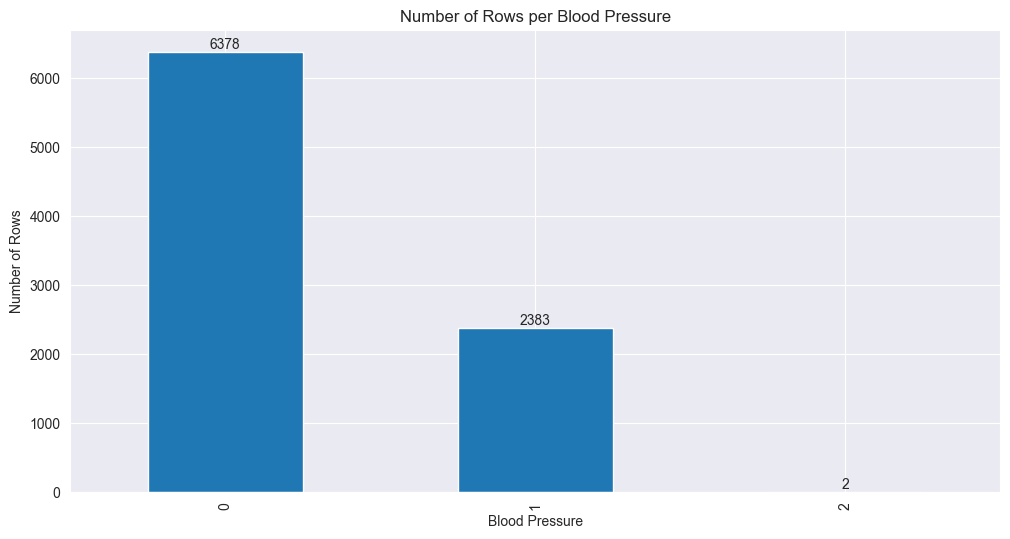

In [575]:
blood_pressure_counts = data['Blood Pressure'].value_counts()
blood_pressure_counts = blood_pressure_counts.sort_index()
plt.figure(figsize=(12, 6))
blood_pressure_counts.plot(kind='bar')
plt.xlabel('Blood Pressure')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Blood Pressure')
for i, count in enumerate(blood_pressure_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

*We can note that the blood pressure column has no senseless values, since these are 3 correct values.
The repartition between the 3 categories is not well-balanced since there are more than twice as many 0 as 1, and no value in category 2*

##### Link with heart attack risk

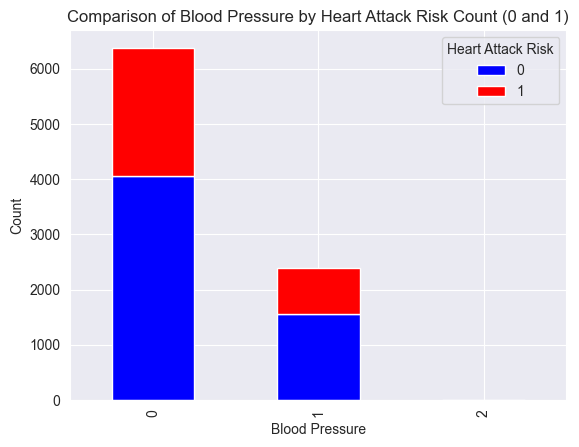

In [576]:
count_data = data.groupby(['Blood Pressure', 'Heart Attack Risk']).size().unstack(fill_value=0)
ax = count_data.plot(kind='bar', stacked=True, color=['b', 'r'])
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.title('Comparison of Blood Pressure by Heart Attack Risk Count (0 and 1)')
plt.legend(title='Heart Attack Risk', labels=['0', '1'])
plt.show()

#### Heart Rate column
##### Type

In [630]:
print(data['Heart Rate'].dtype)
heart_rate = data['Heart Rate'].unique()
print(heart_rate)

int64


*Heart Rate has a numerical type which is what we want.
But since there are so many values and the important thing is the number in general and not so many in particular, we're going to create categories: *

TODO

In [578]:
# TODO Create heart rate categories

##### Senseless values and repartition

In [579]:
# TODO

# TODO interpretation

##### Link with heart attack risk

In [580]:
# TODO

# TODO interpretation

#### Cholesterol column
##### Type

In [632]:
print(data['Cholesterol'].dtype)
cholesterol = data['Cholesterol'].unique()
print(cholesterol)

int64
[1 2 0]


*Cholesterol has a numerical type which is what we want.
But since there are so many values and the important thing is the number in general and not so many in particular, we're going to create categories: 
- Less than 200mg/dL Desirable
- 200-239 mg/dL Borderline high
- 240mg/dL and above High*

In [582]:
cholesterol_values = data['Cholesterol']

# Function to categorize blood pressure values
def categorize_cholesterol(ch):
    try:
        if ch < 200:
            return 0
        elif ch < 240:
            return 1
        else:
            return 2
    except (ValueError, AttributeError):
        # Handle unexpected or missing data
        return -1  # You can assign a special value for such cases

# Applying the function to the cholesterol values
categorized_cholesterol = [categorize_cholesterol(ch) for ch in cholesterol_values]

# Replace the original 'Cholesterol' column with categorized cholesterol values
data['Cholesterol'] = categorized_cholesterol

##### Senseless values and repartition

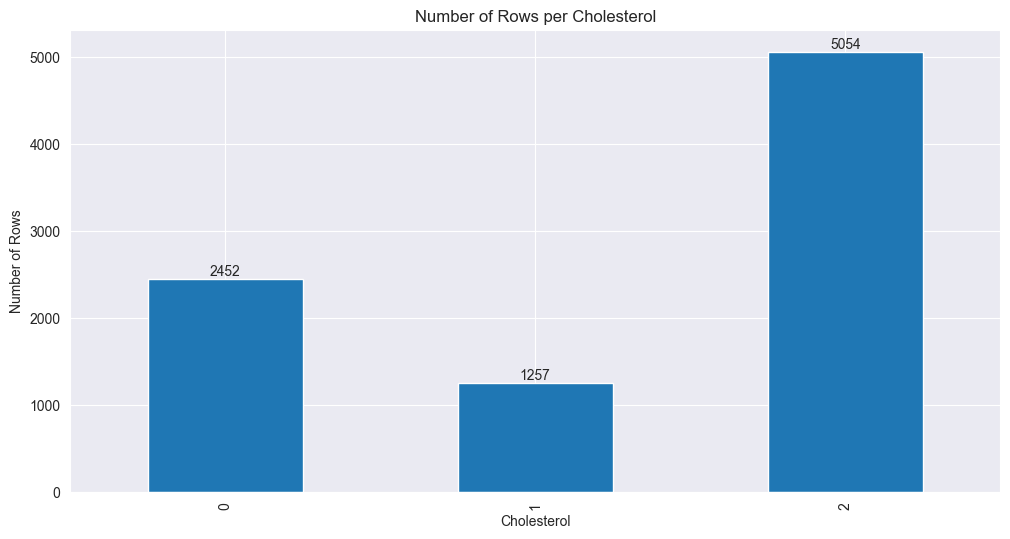

In [583]:
cholesterol_counts = data['Cholesterol'].value_counts()
cholesterol_counts = cholesterol_counts.sort_index()
plt.figure(figsize=(12, 6))
cholesterol_counts.plot(kind='bar')
plt.xlabel('Cholesterol')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Cholesterol')
for i, count in enumerate(cholesterol_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

*We can note that the diet column has no senseless values, since these are 3 correct values
The repartition between the 3 categories is not well-balanced since there are more than twice as many 2 as 0, and even less values in category 1*

##### Link with heart attack risk

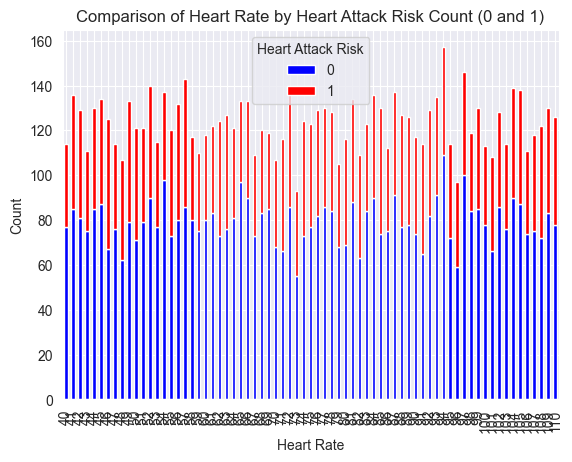

In [584]:
count_data = data.groupby(['Heart Rate', 'Heart Attack Risk']).size().unstack(fill_value=0)
ax = count_data.plot(kind='bar', stacked=True, color=['b', 'r'])
plt.xlabel('Heart Rate')
plt.ylabel('Count')
plt.title('Comparison of Heart Rate by Heart Attack Risk Count (0 and 1)')
plt.legend(title='Heart Attack Risk', labels=['0', '1'])
plt.show()

TODO INTERPREATION

#### Family History column
##### Type and senseless values

In [585]:
print(data['Family History'].dtype)
family_history = data['Family History'].unique()
print(family_history)

int64
[0 1]


*Family History has a numerical type which is what we want.
We can note that the family history column has no senseless values, since these are 2 correct values*
##### Repartition

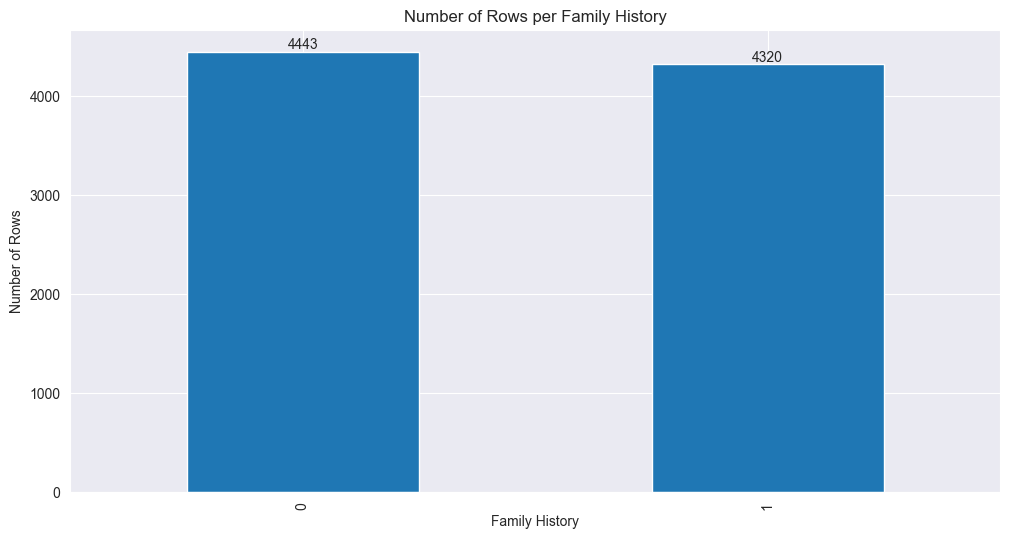

In [586]:
family_history_counts = data['Family History'].value_counts()
family_history_counts = family_history_counts.sort_index()
plt.figure(figsize=(12, 6))
family_history_counts.plot(kind='bar')
plt.xlabel('Family History')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Family History')
for i, count in enumerate(family_history_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

*The repartition between the 2 cateogories is well-balanced*

##### Link with heart attack risk

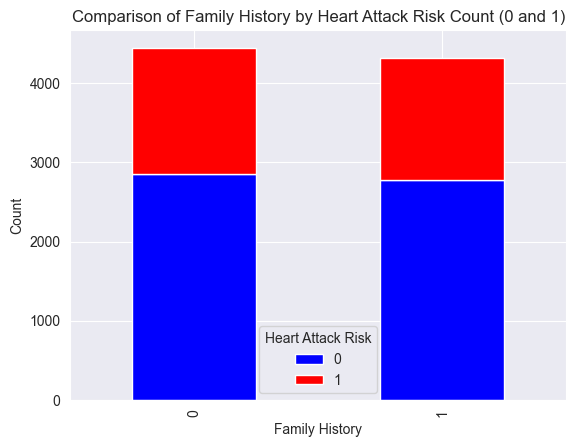

In [587]:
count_data = data.groupby(['Family History', 'Heart Attack Risk']).size().unstack(fill_value=0)
ax = count_data.plot(kind='bar', stacked=True, color=['b', 'r'])
plt.xlabel('Family History')
plt.ylabel('Count')
plt.title('Comparison of Family History by Heart Attack Risk Count (0 and 1)')
plt.legend(title='Heart Attack Risk', labels=['0', '1'])
plt.show()

plt.show()
TODO INTERPREATION

#### Smoking column
##### Type and Senseless values

In [588]:
print(data['Smoking'].dtype)
smoking = data['Smoking'].unique()
print(smoking)

int64
[1 0]


*Smoking has a numerical type which is what we want.
We can note that the family history column has no senseless values, since these are 2 correct values*
##### Repartition

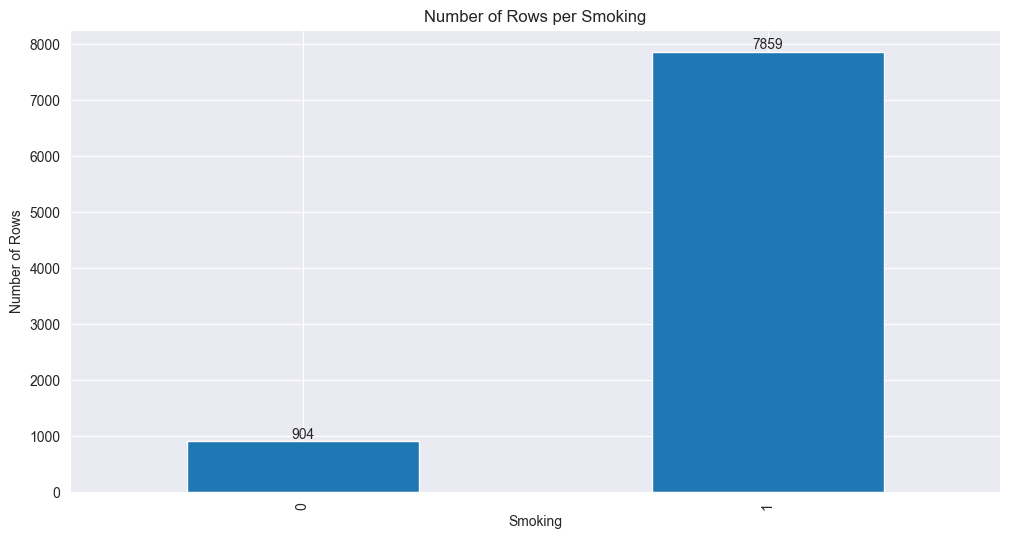

In [589]:
smoking_counts = data['Smoking'].value_counts()
smoking_counts = smoking_counts.sort_index()
plt.figure(figsize=(12, 6))
smoking_counts.plot(kind='bar')
plt.xlabel('Smoking')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Smoking')
for i, count in enumerate(smoking_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

TODO INTERPRETATION
##### Link with heart attack risk

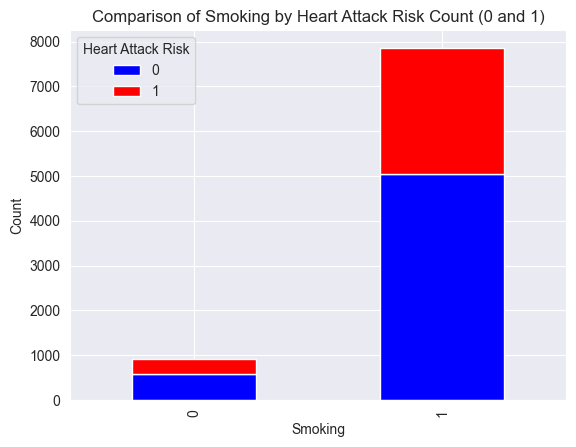

In [590]:
count_data = data.groupby(['Smoking', 'Heart Attack Risk']).size().unstack(fill_value=0)
ax = count_data.plot(kind='bar', stacked=True, color=['b', 'r'])
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Comparison of Smoking by Heart Attack Risk Count (0 and 1)')
plt.legend(title='Heart Attack Risk', labels=['0', '1'])
plt.show()

#### Obesity column
##### Type and Senseless values

In [591]:
print(data['Obesity'].dtype)
obesity = data['Obesity'].unique()
print(obesity)

int64
[0 1]


*Obesity has a numerical type which is what we want.
We can note that the family history column has no senseless values, since these are 2 correct values*
##### Repartition

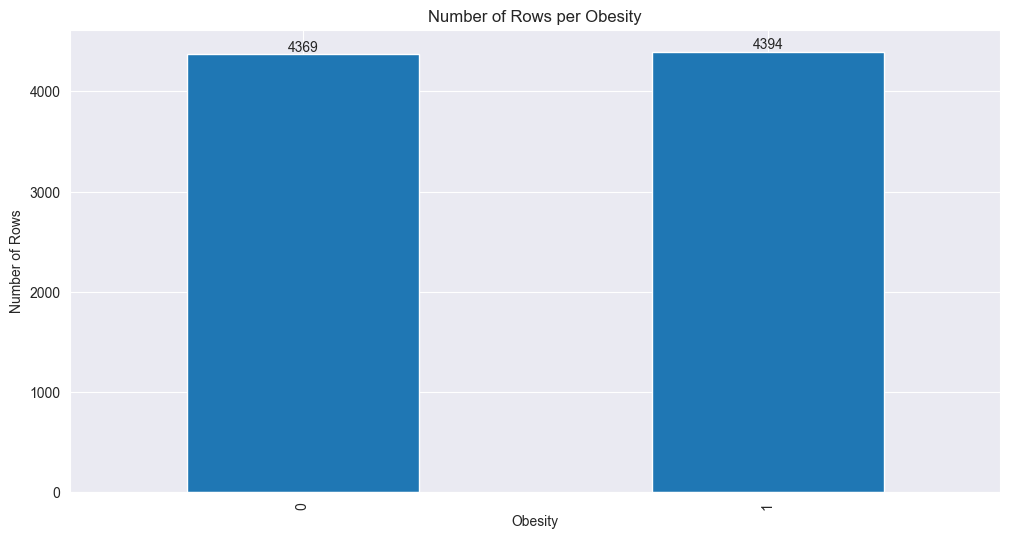

In [592]:
obesity_counts = data['Obesity'].value_counts()
obesity_counts = obesity_counts.sort_index()
plt.figure(figsize=(12, 6))
obesity_counts.plot(kind='bar')
plt.xlabel('Obesity')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Obesity')
for i, count in enumerate(obesity_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

TODO INTERPRETATION
##### Link with heart attack risk

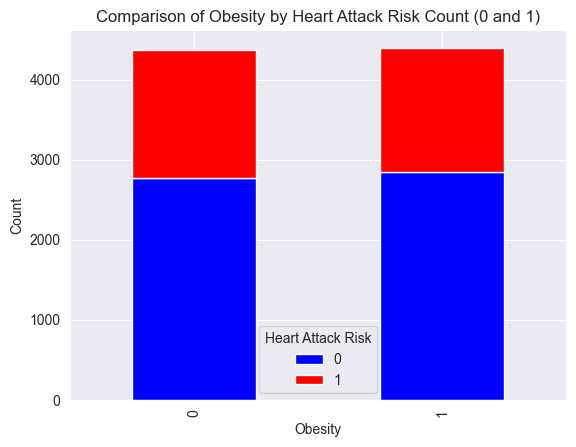

In [593]:
count_data = data.groupby(['Obesity', 'Heart Attack Risk']).size().unstack(fill_value=0)
ax = count_data.plot(kind='bar', stacked=True, color=['b', 'r'])
plt.xlabel('Obesity')
plt.ylabel('Count')
plt.title('Comparison of Obesity by Heart Attack Risk Count (0 and 1)')
plt.legend(title='Heart Attack Risk', labels=['0', '1'])
plt.show()

#### Alcohol Consumption column
##### Type and Senseless values

In [594]:
print(data['Alcohol Consumption'].dtype)
alcohol_consumption = data['Alcohol Consumption'].unique()
print(alcohol_consumption)

int64
[0 1]


*Alcohol Consumption has a numerical type which is what we want.
We can note that the family history column has no senseless values, since these are 2 correct values*
##### Repartition

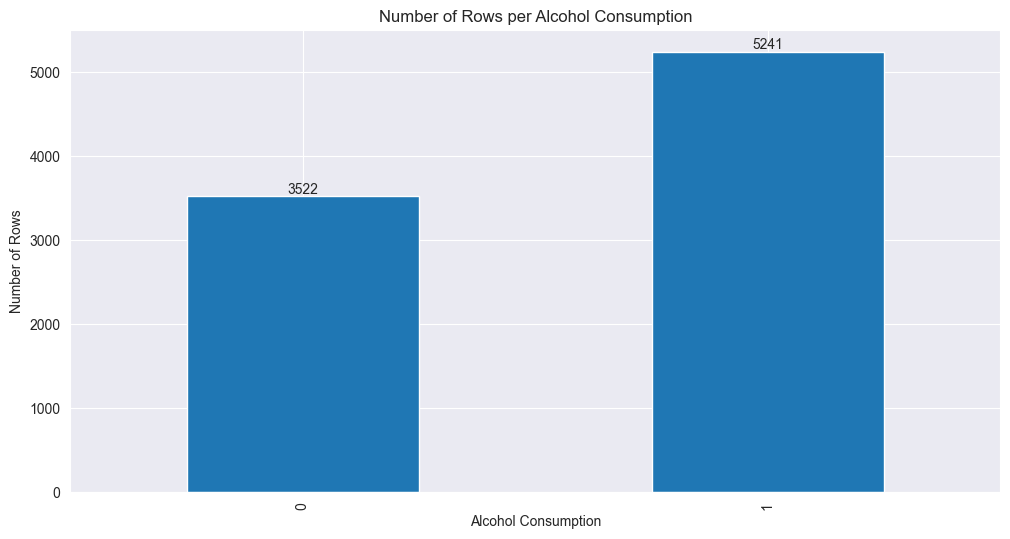

In [595]:
alcohol_consumption_counts = data['Alcohol Consumption'].value_counts()
alcohol_consumption_counts = alcohol_consumption_counts.sort_index()
plt.figure(figsize=(12, 6))
alcohol_consumption_counts.plot(kind='bar')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Alcohol Consumption')
for i, count in enumerate(alcohol_consumption_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

TODO INTERPRETATION
##### Link with heart attack risk

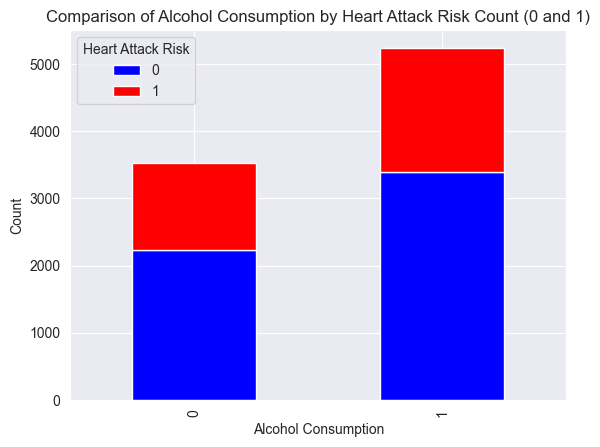

In [596]:
count_data = data.groupby(['Alcohol Consumption', 'Heart Attack Risk']).size().unstack(fill_value=0)
ax = count_data.plot(kind='bar', stacked=True, color=['b', 'r'])
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.title('Comparison of Alcohol Consumption by Heart Attack Risk Count (0 and 1)')
plt.legend(title='Heart Attack Risk', labels=['0', '1'])
plt.show()

#### Exercise Hours Per Week column
##### Type

In [597]:
print(data['Exercise Hours Per Week'].dtype)

float64


TODO INTERPRETATION

*Since there are so many values and the important thing is the number in general and not so many in particular, we're going to create categories:
- Sedentary: Less than 1 hour per week.
- Lightly Active: 1 to 3 hours per week.
- Moderately Active: 4 to 6 hours per week.
- Very Active: 7 to 10 hours per week.
- Extremely Active: More than 10 hours per week.*

In [598]:
# TODO exercice hours per week in categories

TODO INTERPRETATION

##### Senseless values and repartition

In [599]:
# TODO

##### Link with heart attack risk

In [600]:
#TODO

#### Diet column
##### Type and Senseless values

In [601]:
print(data['Diet'].dtype)
diet = data['Diet'].unique()
print(diet)

object
['Average' 'Unhealthy' 'Healthy']


*We can note that the family history column has no senseless values, since these are 3 correct values*

In [602]:
# Make Diet numerical
diet = data['Diet'].unique()
# Create an empty dictionary to store the mapping
diet_mapping = {}

# Iterate over unique diets and assign numerical values
for i in range(len(diet)):
    diet_mapping[diet[i]] = i

# Map the 'Diet' column using the created mapping
data['Diet'] = data['Diet'].map(diet_mapping)
print(data['Diet'][:15])

0     0
1     1
2     2
3     0
4     1
5     1
6     2
7     0
8     0
9     1
10    0
11    0
12    1
13    2
14    1
Name: Diet, dtype: int64


##### Repartition

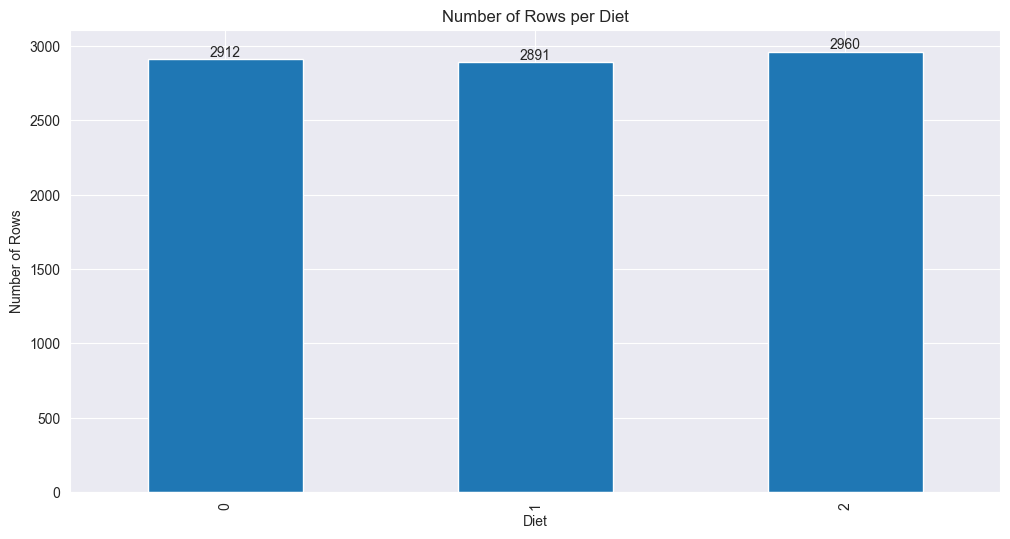

In [603]:
diet_counts = data['Diet'].value_counts()
diet_counts = diet_counts.sort_index()
plt.figure(figsize=(12, 6))
diet_counts.plot(kind='bar')
plt.xlabel('Diet')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Diet')
for i, count in enumerate(diet_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

*We can note that the diet column has no senseless values, since these are 3 correct values<br>
Also, the repartition between the 3 categories is balanced*

##### Link with heart attack risk

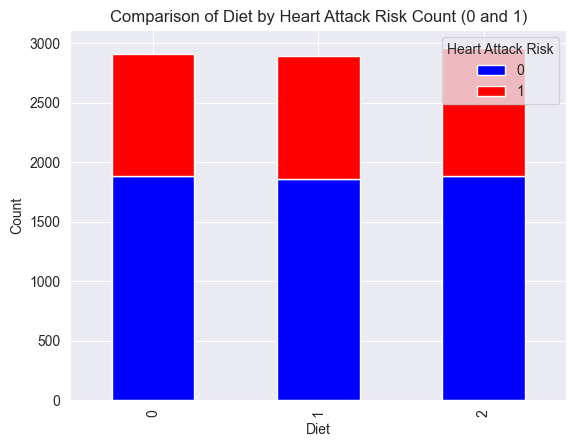

In [604]:
count_data = data.groupby(['Diet', 'Heart Attack Risk']).size().unstack(fill_value=0)
ax = count_data.plot(kind='bar', stacked=True, color=['b', 'r'])
plt.xlabel('Diet')
plt.ylabel('Count')
plt.title('Comparison of Diet by Heart Attack Risk Count (0 and 1)')
plt.legend(title='Heart Attack Risk', labels=['0', '1'])
plt.show()

#### Previous Heart Problems column
##### Type and senseless values

In [605]:
print(data['Previous Heart Problems'].dtype)
previous_heart_problems = data['Previous Heart Problems'].unique()
print(previous_heart_problems)

int64
[0 1]


*We can note that the Previous Heart column has no senseless values, since these are 2 correct values*
##### Repartition

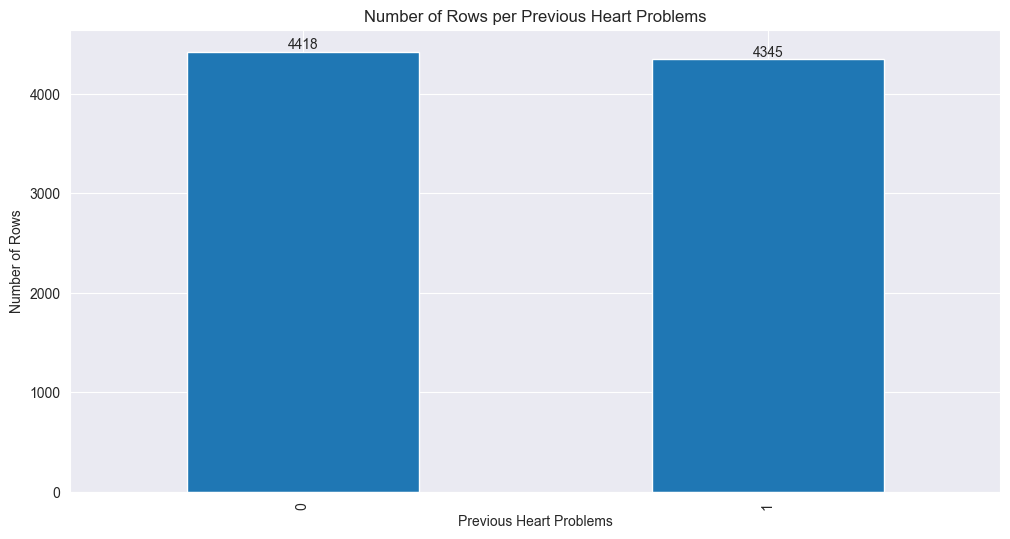

In [606]:
previous_heart_problems_counts = data['Previous Heart Problems'].value_counts()
previous_heart_problems_counts = previous_heart_problems_counts.sort_index()
plt.figure(figsize=(12, 6))
previous_heart_problems_counts.plot(kind='bar')
plt.xlabel('Previous Heart Problems')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Previous Heart Problems')
for i, count in enumerate(previous_heart_problems_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

*The repartition between the 2 categories is balanced*

##### Link with heart attack risk

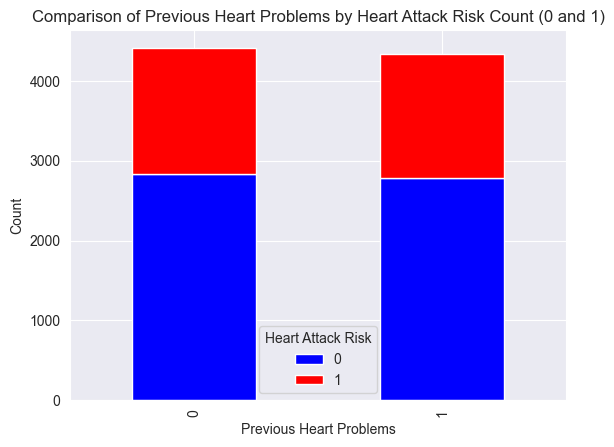

In [607]:
count_data = data.groupby(['Previous Heart Problems', 'Heart Attack Risk']).size().unstack(fill_value=0)
ax = count_data.plot(kind='bar', stacked=True, color=['b', 'r'])
plt.xlabel('Previous Heart Problems')
plt.ylabel('Count')
plt.title('Comparison of Previous Heart Problems by Heart Attack Risk Count (0 and 1)')
plt.legend(title='Heart Attack Risk', labels=['0', '1'])
plt.show()

#### Medication Use column
#####Type

In [608]:
print(data['Medication Use'].dtype)
medication_use = data['Medication Use'].unique()
print(medication_use)

int64
[0 1]


*We can note that the Medication Use column has no senseless values, since these are 2 correct values*
##### Repartition

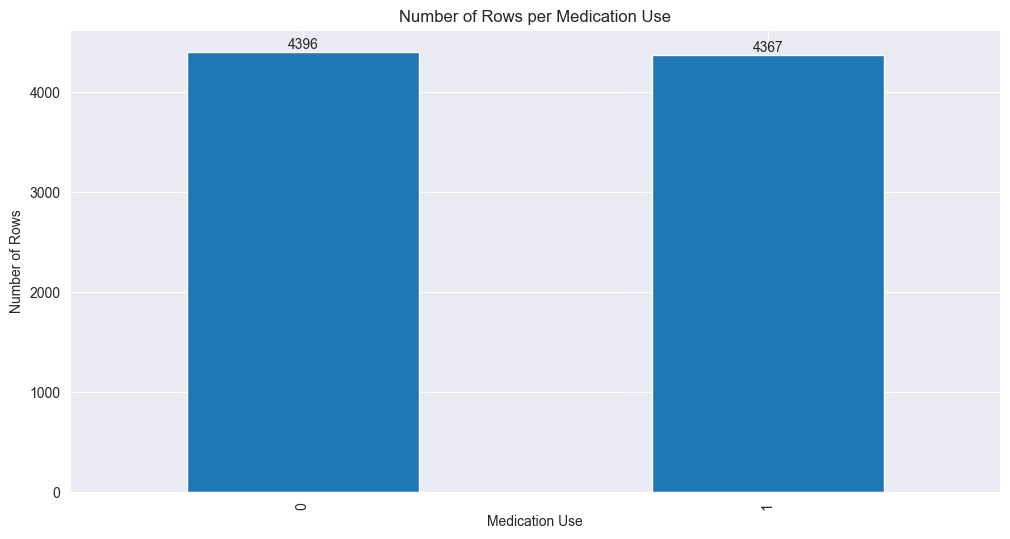

In [609]:
medical_use_counts = data['Medication Use'].value_counts()
medical_use_counts = medical_use_counts.sort_index()
plt.figure(figsize=(12, 6))
medical_use_counts.plot(kind='bar')
plt.xlabel('Medication Use')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Medication Use')
for i, count in enumerate(medical_use_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

*The repartition between the 2 categories is balanced*

##### Link with heart attack risk

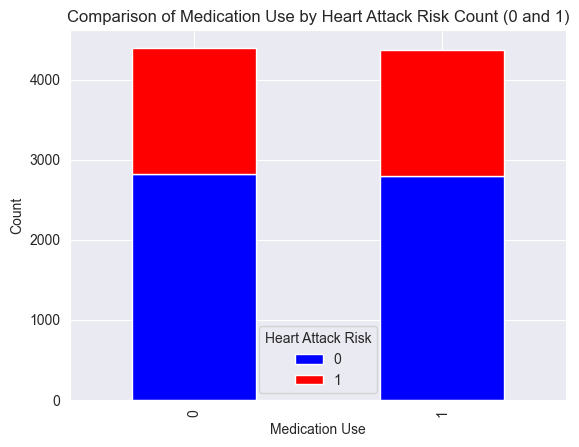

In [610]:
count_data = data.groupby(['Medication Use', 'Heart Attack Risk']).size().unstack(fill_value=0)
ax = count_data.plot(kind='bar', stacked=True, color=['b', 'r'])
plt.xlabel('Medication Use')
plt.ylabel('Count')
plt.title('Comparison of Medication Use by Heart Attack Risk Count (0 and 1)')
plt.legend(title='Heart Attack Risk', labels=['0', '1'])
plt.show()

#### Stress Level column
#####Type

In [611]:
print(data['Stress Level'].dtype)
stress_level = data['Stress Level'].unique()
print(stress_level)

int64
[ 9  1  6  2  7  4  5  8 10  3]


*We can note that the Stress Level column has no senseless values, since these are 10 correct values*
##### Repartition

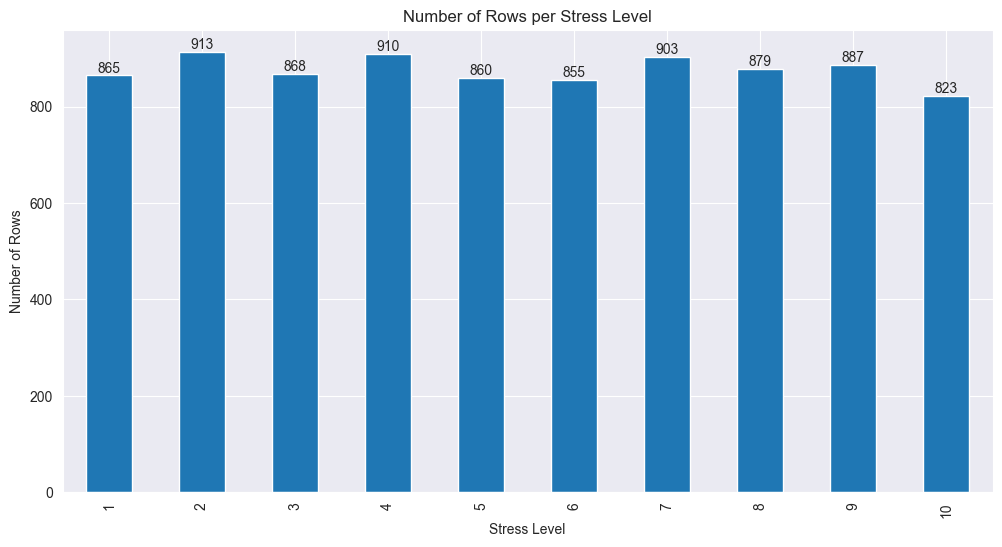

In [612]:
stress_level_counts = data['Stress Level'].value_counts()
stress_level_counts = stress_level_counts.sort_index()
plt.figure(figsize=(12, 6))
stress_level_counts.plot(kind='bar')
plt.xlabel('Stress Level')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Stress Level')
for i, count in enumerate(stress_level_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

*The repartition between the 2 categories is fairly evenly balanced*

##### Link with heart attack risk

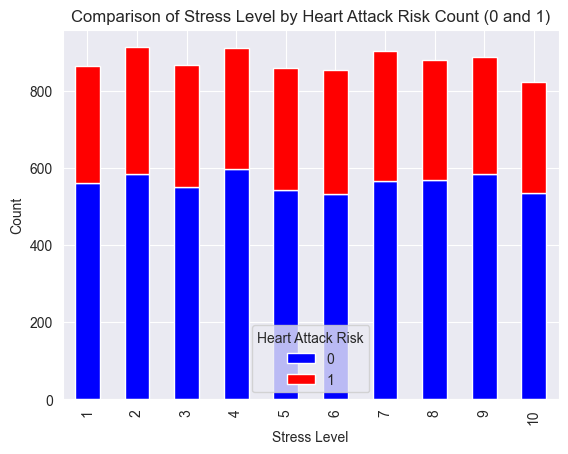

In [613]:
count_data = data.groupby(['Stress Level', 'Heart Attack Risk']).size().unstack(fill_value=0)
ax = count_data.plot(kind='bar', stacked=True, color=['b', 'r'])
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.title('Comparison of Stress Level by Heart Attack Risk Count (0 and 1)')
plt.legend(title='Heart Attack Risk', labels=['0', '1'])
plt.show()

#### Sedentary Hours Per Day column
#####Type

#### Income column
#####Type

#### BMI column
#####Type

#### Triglycerides column
#####Type

#### Physical Activity Days Per Week column
#####Type

#### Sleep Hours Per Day column
#####Type

#### Country column
##### Type and senseless values

In [614]:
print(data['Country'].dtype)
country = data['Country'].unique()
print(country)

object
['Argentina' 'Canada' 'France' 'Thailand' 'Germany' 'Japan' 'Brazil'
 'South Africa' 'United States' 'Vietnam' 'China' 'Italy' 'Spain' 'India'
 'Nigeria' 'New Zealand' 'South Korea' 'Australia' 'Colombia'
 'United Kingdom']


**We can note that the country column has no senseless values, since these are 20 correct values**

In [615]:
#make Country numerical
country = data['Country'].unique()
# Create an empty dictionary to store the mapping
country_mapping = {}
# Iterate over unique countries and assign numerical values
for i in range(len(country)):
    country_mapping[country[i]] = i

# Map the 'Country' column using the created mapping
data['Country'] = data['Country'].map(country_mapping)
print(data.head())

   Age  Sex  Cholesterol  Blood Pressure  Heart Rate  Diabetes  \
0   67    0            1               0          72         0   
1   21    0            2               0          98         1   
2   21    1            2               0          72         1   
3   84    0            2               0          73         1   
4   66    0            2               1          93         1   

   Family History  Smoking  Obesity  Alcohol Consumption  ...  \
0               0        1        0                    0  ...   
1               1        1        1                    1  ...   
2               0        0        0                    0  ...   
3               1        1        0                    1  ...   
4               1        1        1                    0  ...   

   Sedentary Hours Per Day  Income        BMI  Triglycerides  \
0                 6.615001  261404  31.251233            286   
1                 4.963459  285768  27.194973            235   
2                 9.

##### Repartition

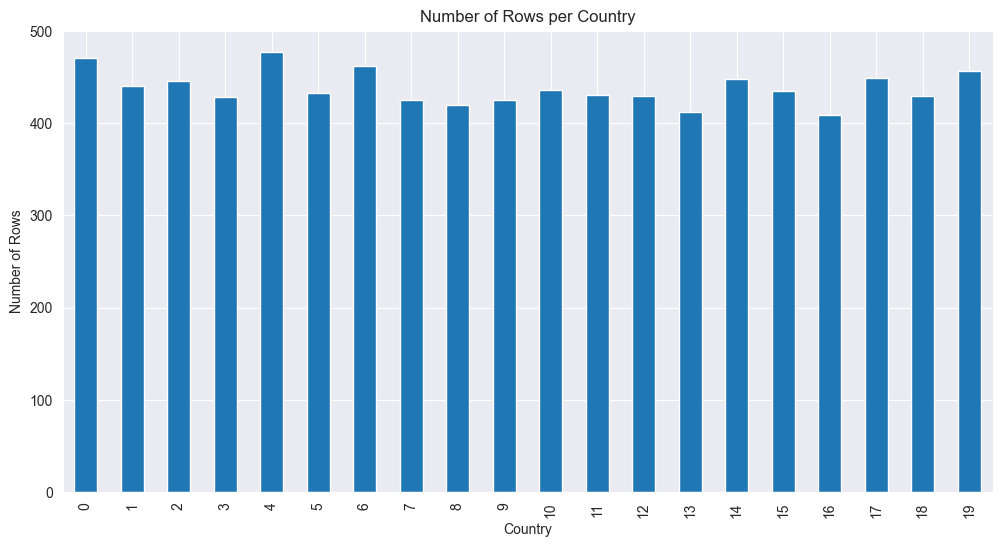

In [616]:
country_counts = data['Country'].value_counts()
country_counts = country_counts.sort_index()
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Country')
plt.show()

##### Link with heart attack risk

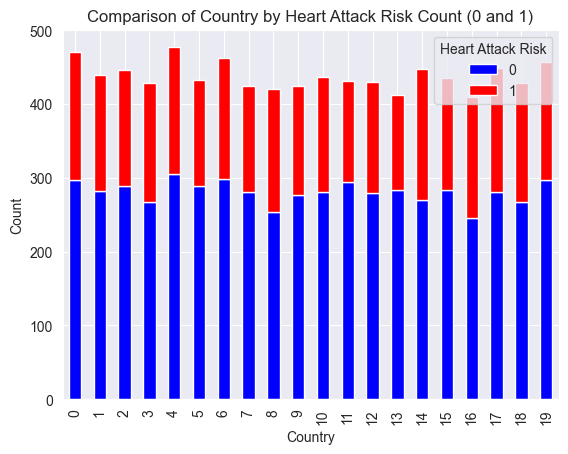

In [617]:
count_data = data.groupby(['Country', 'Heart Attack Risk']).size().unstack(fill_value=0)
ax = count_data.plot(kind='bar', stacked=True, color=['b', 'r'])
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Comparison of Country by Heart Attack Risk Count (0 and 1)')
plt.legend(title='Heart Attack Risk', labels=['0', '1'])
plt.show()

#### Continent column
##### Type and senseless values

In [618]:
print(data['Continent'].dtype)
continent = data['Continent'].unique()
print(continent)

object
['South America' 'North America' 'Europe' 'Asia' 'Africa' 'Australia']


*We can note that the continent column has no senseless values, since these are 6 correct values*

In [619]:
# make continent numerical
continent = data['Continent'].unique()
# Create an empty dictionary to store the mapping
continent_mapping = {}
# Iterate over unique countries and assign numerical values
for i in range(len(continent)):
    continent_mapping[continent[i]] = i

# Map the 'Continent' column using the created mapping
data['Continent'] = data['Continent'].map(continent_mapping)

##### Repartition

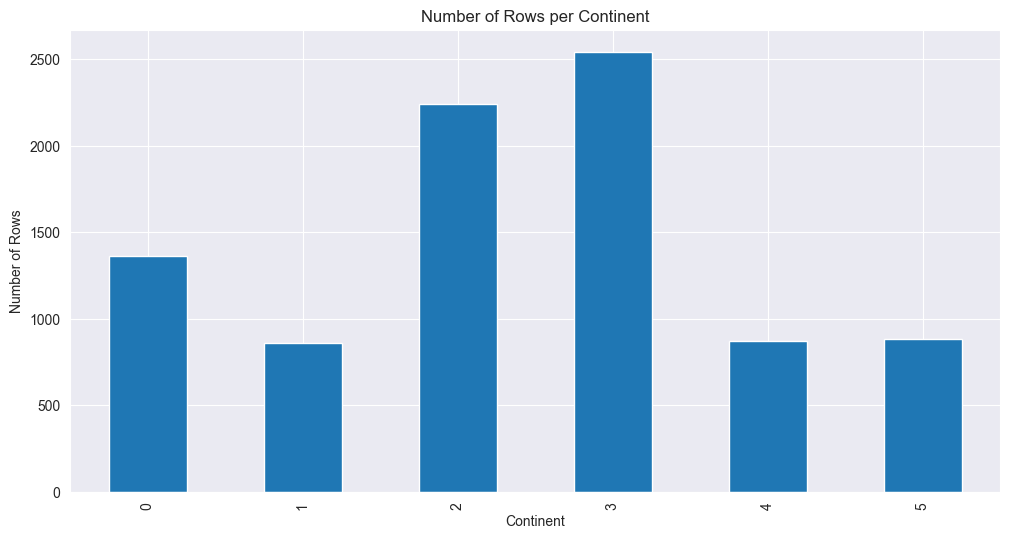

In [620]:
continent_counts = data['Continent'].value_counts()
continent_counts = continent_counts.sort_index()
plt.figure(figsize=(12, 6))
continent_counts.plot(kind='bar')
plt.xlabel('Continent')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Continent')
plt.show()

##### Link with heart attack risk

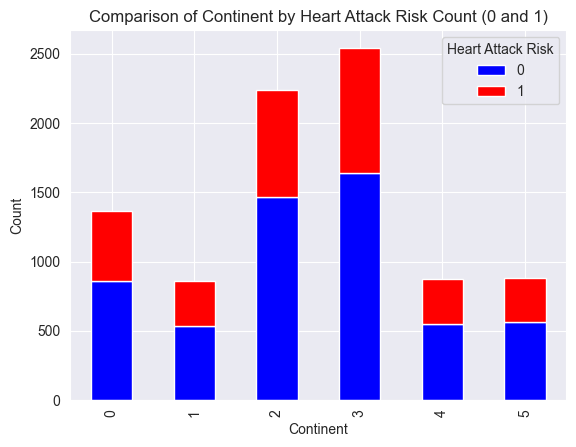

In [621]:
count_data = data.groupby(['Continent', 'Heart Attack Risk']).size().unstack(fill_value=0)
ax = count_data.plot(kind='bar', stacked=True, color=['b', 'r'])
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('Comparison of Continent by Heart Attack Risk Count (0 and 1)')
plt.legend(title='Heart Attack Risk', labels=['0', '1'])
plt.show()

#### Hemisphere column
##### Type and Senseless values

In [622]:
print(data['Hemisphere'].dtype)
hemisphere = data['Hemisphere'].unique()
print(hemisphere)

object
['Southern Hemisphere' 'Northern Hemisphere']


*We can note that the continent column has no senseless values, since these are 2 correct values*

In [623]:
#make hemisphere numerical
hemisphere = data['Hemisphere'].unique()
# Create an empty dictionary to store the mapping
hemisphere_mapping = {}
# Iterate over unique hemiphere and assign numerical values
for i in range(len(hemisphere)):
    hemisphere_mapping[hemisphere[i]] = i

# Map the 'Hemisphere' column using the created mapping
data['Hemisphere'] = data['Hemisphere'].map(hemisphere_mapping)

##### Repartition

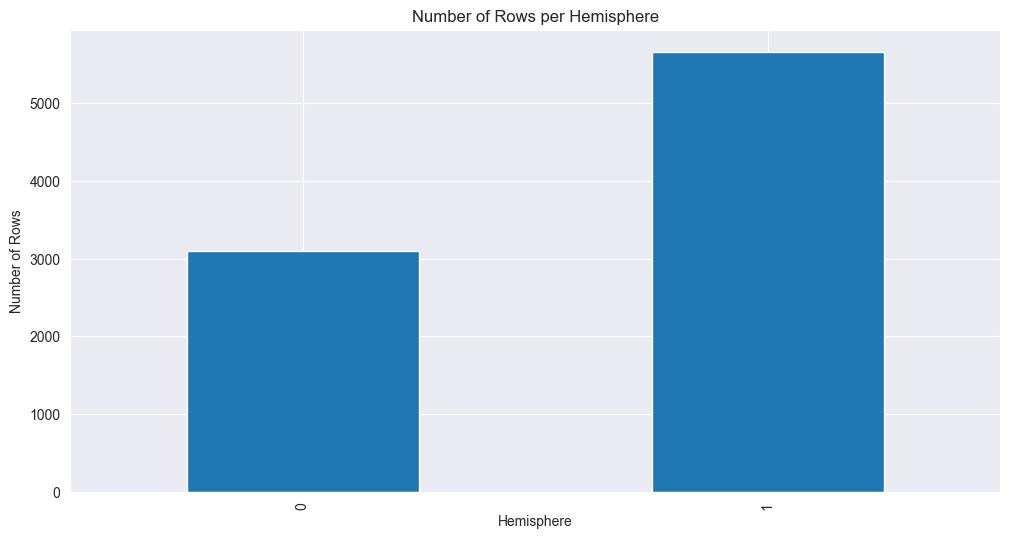

In [624]:
hemisphere_counts = data['Hemisphere'].value_counts()
hemisphere_counts = hemisphere_counts.sort_index()
plt.figure(figsize=(12, 6))
hemisphere_counts.plot(kind='bar')
plt.xlabel('Hemisphere')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Hemisphere')
plt.show()

##### Link with heart attack risk

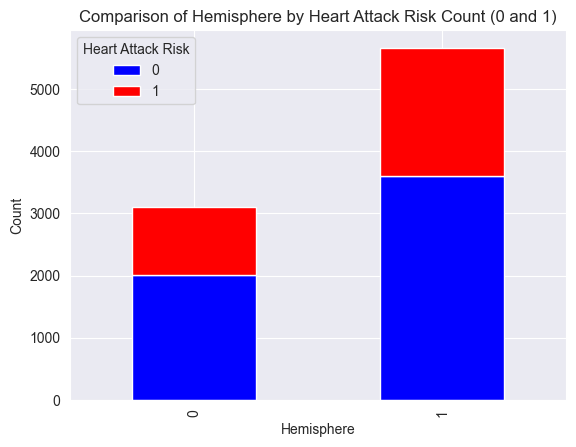

In [625]:
count_data = data.groupby(['Hemisphere', 'Heart Attack Risk']).size().unstack(fill_value=0)
ax = count_data.plot(kind='bar', stacked=True, color=['b', 'r'])
plt.xlabel('Hemisphere')
plt.ylabel('Count')
plt.title('Comparison of Hemisphere by Heart Attack Risk Count (0 and 1)')
plt.legend(title='Heart Attack Risk', labels=['0', '1'])
plt.show()

#### Heart Attack Risk column

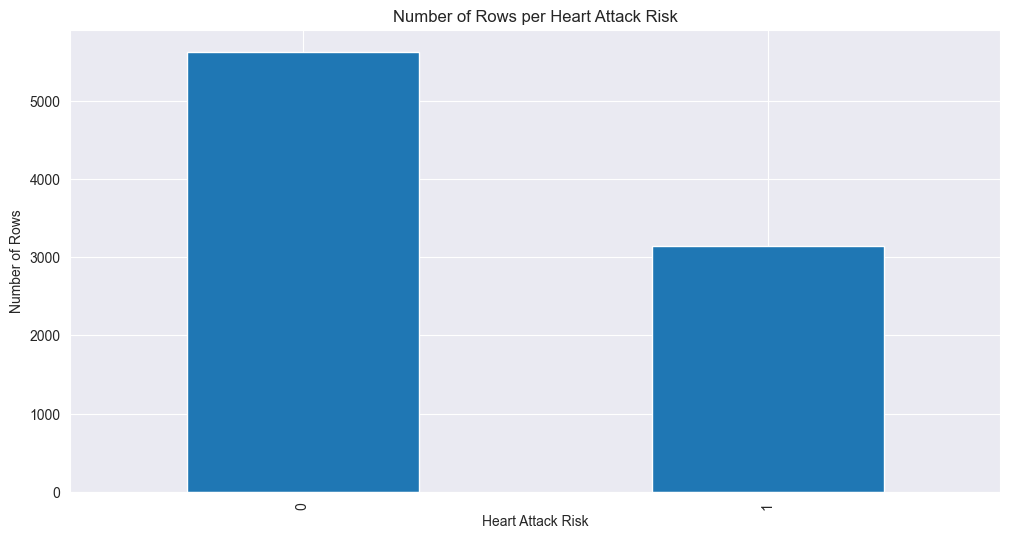

In [626]:
heart_attack_counts = data['Heart Attack Risk'].value_counts()
heart_attack_counts = heart_attack_counts.sort_index()
plt.figure(figsize=(12, 6))
heart_attack_counts.plot(kind='bar')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Heart Attack Risk')
plt.show()

*The dataset is not balanced (take it into account later)*

### Verification of our dataset

In [627]:
print(data.dtypes)

Age                                  int64
Sex                                  int64
Cholesterol                          int64
Blood Pressure                       int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                              int64
Continent                            int64
Hemisphere 

*It is all good, all we have now is digital data*

##### Correlation

                                      Age       Sex  Cholesterol  \
Age                              1.000000 -0.020067     0.003338   
Sex                             -0.020067  1.000000    -0.006081   
Cholesterol                      0.003338 -0.006081     1.000000   
Blood Pressure                   0.020654 -0.008021    -0.000518   
Heart Rate                      -0.003844  0.010921     0.002170   
Diabetes                        -0.014105 -0.003582    -0.011824   
Family History                   0.008353 -0.002180    -0.018420   
Smoking                          0.394891 -0.514837     0.021582   
Obesity                         -0.008140 -0.002376    -0.007476   
Alcohol Consumption             -0.006666 -0.002085     0.001803   
Exercise Hours Per Week          0.001206  0.006976     0.027204   
Diet                            -0.011114  0.002268    -0.001631   
Previous Heart Problems          0.000868 -0.001964    -0.006552   
Medication Use                   0.000980  0.007

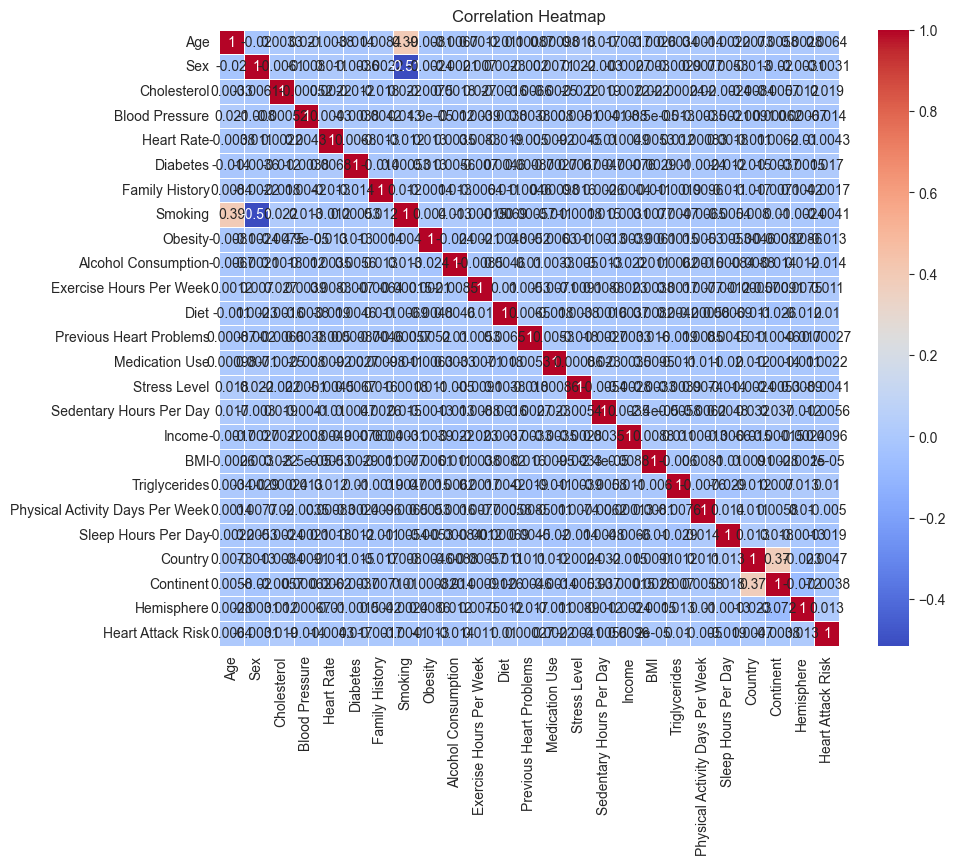

In [628]:
correlation_matrix = data.corr()
print(correlation_matrix)
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()